# K-Means Interview

### What to expect

* Spend the **first half** of the interview implementing the missing portion of K-Means algorithm.

* Spend the **second half** of the interview ensuring robustness and stability of the algorithm, discussing some of the use-cases, and broader discussion of its applications. (time permitting; might or might not involve changes to the implementation)

#### K-Means recap

K-Means is an unsupervised clustering algorithm that partitions data into K clusters based on feature similarity.

Steps:
1. Initialize
2. Assign to clusters: Assign each data point to the nearest centroid (based on distance).
3. Update centroids: Recalculate the centroids as the mean of the points in each cluster.
4. Repeat steps 2 and 3 until convergence.

#### NOTE
**This code is just a starting point, don't assume anything is optimal or fully correct. That said, it should be sufficient to get you started.**

**Feel free to modify any code.**

**Vectorized implementation is not required.**

In [1]:
import numpy as np
np.random.seed(42)

import torch
from kmeans_tests import *
from unit_tests import *
from utils import *

## Part 1: Implementation

Implementing missing pieces of K-Means algorithm implementation.
In particular:
```python
def get_assignments(self, points: np.ndarray) -> np.ndarray:
    ...
    raise NotImplementedError()

def _recalculate_centroids(self, points: np.ndarray, new_assignments: np.ndarray) -> np.ndarray:
    ...
    raise NotImplementedError()
```

### K-Means implementation

**TIP**: Use `help(<function>)` or `<function>??` to get info about Numpy API, e.g. `help(np.random.rand)` or `np.random.rand??`.

In [2]:
np.random.rand(3,2)

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452]])

In [3]:
torch.rand(3,2)

tensor([[0.9774, 0.8202],
        [0.6630, 0.0190],
        [0.0305, 0.9226]])

In [4]:
np.zeros((3,))

array([0., 0., 0.])

In [5]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
torch.zeros(3,2)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [ ]:
class KMeans:
    def __init__(self, n_clusters: int, max_iter: int = 2, **kwargs):
        """
        params:
            n_clusters: number of clusters to cluster into.
            max_iter: limit on the number of iterations to run.
        """
        self.n_clusters: int = n_clusters
        self.max_iter: int = max_iter

        # shape: (n_clusters, number of features)
        self.centroids: np.ndarray | None = None


    def _initialize(self, points: np.ndarray) -> None:
        """
        Initializes centroids array.

        params:
            points: Numpy array of shape (number of points, number of features).
        """
        # self.centroids = np.zeros(self.n_clusters, points.shape[0])
        self.centroids = np.random.rand(self.n_clusters, points.shape[1])


    def _terminate_cond(self, iter_num: int, **kwargs) -> bool:
        """
        Checks whether the algorithm should stop iterating.
        
        params:
            iter_num: int, current iteration number.
        """
        return iter_num == self.max_iter - 1


    def fit(self, points: np.ndarray) -> None:
        """
        Runs K-Means and updates self.centroids based on points.

        params:
            points: Numpy array of shape (number of points, number of features).
        """
        assert points.ndim == 2
        
        self._initialize(points)

        assignments = np.zeros((points.shape[0], ))
        
        for iter_num in range(self.max_iter):
            # 1. Cluster assignment.
            new_assignments = self.get_assignments(points)
            # print(f"new_assignments: {new_assignments}")
            
            # 2. Centroid update.
            # points (num_points, num_features)
            # new_assignments (num_points)
            new_centroids = self._recalculate_centroids(points, new_assignments=new_assignments)
            # print(f"new_centroids: {new_centroids}")
            
            # 3. Stopping condition.
            # Esentially, call self._terminate_cond(iter_num=iter_num, local_var1=local_var1, ...).
            should_terminate = KMeans._terminate_cond(**locals())
            
            # 4. Update and continue.
            self.centroids = new_centroids
            assignments = new_assignments
            
            if should_terminate:
                break


    def get_assignments(self, points: np.ndarray) -> np.ndarray:
        """
        Assigns each point to a cluster based on the current centroids.
        
        params:
            points: Numpy array of shape (number of points, number of features).

        returns:
            Numpy array of shape (number of points,) with numbers in range [0, self.n_clusters).
        """
        # raise NotImplementedError()

        b, nf = points.shape
        nc, _ = self.centroids.shape
        assignments = []

        for i in range(b):
            pt = points[i]

            dists = []
            for j in range(nc):
                # dist between ith pt and jth centroid
                dist = np.sum((pt - self.centroids[j])**2)
                dists.append(dist)
            
            # find closest centroid
            k = np.argmin(dists)
            assignments.append(k)
        
        return np.array(assignments)

    def _recalculate_centroids(self, points: np.ndarray, new_assignments: np.ndarray) -> np.ndarray:
        """
        Re-calculates new centroids based on cluster assignment.

        params:
            points: Numpy array of shape (number of points, number of features).
            new_assignments: Numpy array of shape (number of points,) with numbers in range [0, self.n_clusters).

        returns:
            Numpy array of shape (self.n_clusters, number of features) representing recalculated centroids.
        """
        # raise NotImplementedError()

        nc, nf = self.centroids.shape
        b = new_assignments.shape[0]

        """
        - take each centroid i 
             - take all points assigned to centroid i
             - compute the new centroid based on these points
             - assign this as the new cenroid of i
        - return new centroid     
        """

        new_cenrtoids = []
        for i in range(nc):
            points_centroid_i = []
            for j in range(b):
                if new_assignments[j] == i:
                    points_centroid_i.append(points[j])

            # compute new centroid
            if len(points_centroid_i) == 0:
                new_cenrtoids.append(self.centroids[i])
            else:
                new_centroid = np.mean(points_centroid_i, axis=0)
                new_cenrtoids.append(new_centroid)

        return np.array(new_cenrtoids)

    
    def plot(self, points: np.ndarray):
        plot_kmeans(
            X=points,
            labels=self.get_assignments(points),
            n_clusters=self.n_clusters,
            centroids=self.centroids,
        )

### Test the implementation

Assignments: [0 1]
Centroids:
 [[0. 0.]
 [1. 1.]]


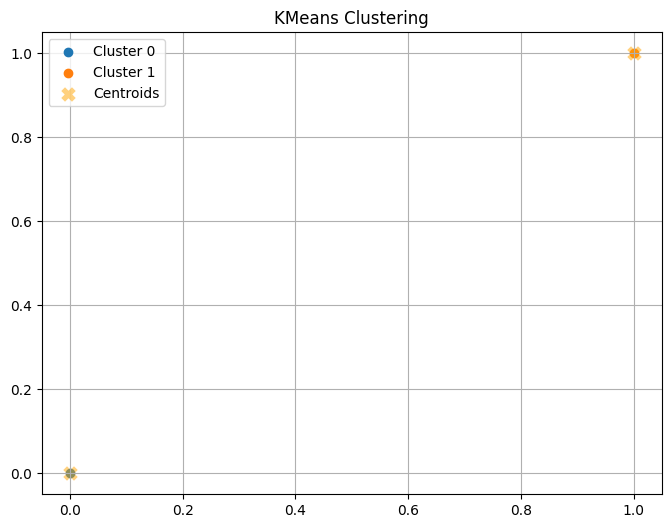

In [8]:
model = KMeans(
    n_clusters=2,
)
points = np.array(
    [
        [0,0], 
        [1,1],
    ]
)

model.fit(points)
assignments = model.get_assignments(points)

print("Assignments:", assignments)
print("Centroids:\n", model.centroids)

model.plot(points)

#### Unit tests

In [9]:
from unit_tests import test_get_assignments_1

test_get_assignments_1(KMeans)

Points: [[0 0]
 [1 1]]
Centroids: [[0 0]
 [1 1]]
Expected assignments: [0 1]
Actual assignments: [0 1]
SUCCESS


In [10]:
from unit_tests import test_get_assignments_2

test_get_assignments_2(KMeans)

Points: [[0.  0. ]
 [1.  1. ]
 [0.5 0.6]
 [0.5 0.4]
 [0.8 0. ]
 [0.8 0.8]]
Centroids: [[0 0]
 [1 1]]
Expected assignments: [0 1 1 0 0 1]
Actual assignments: [0 1 1 0 0 1]
SUCCESS


In [11]:
from unit_tests import test_recalculate_centroids_1

test_recalculate_centroids_1(KMeans)

Points: [[0 0]
 [1 1]]
Assignments: [0 1]
Expected centroids: [[0 0]
 [1 1]]
Actual centroids: [[0. 0.]
 [1. 1.]]
SUCCESS


In [12]:
from unit_tests import test_recalculate_centroids_2

test_recalculate_centroids_2(KMeans)

Points: [[0.  0. ]
 [1.  1. ]
 [0.5 0.6]
 [0.5 0.4]
 [0.8 0. ]
 [0.8 0.8]]
Assignments: [0 1 1 0 0 1]
Expected centroids: [[0.43333333 0.13333333]
 [0.76666667 0.8       ]]
Actual centroids: [[0.43333333 0.13333333]
 [0.76666667 0.8       ]]
SUCCESS


## Part 2: Ensuring stability and robustness

### Sample case 1

Centroids:
[[ 0.14286682  0.65088847]
 [-5.          0.        ]
 [ 5.         -3.        ]
 [ 5.          3.        ]]


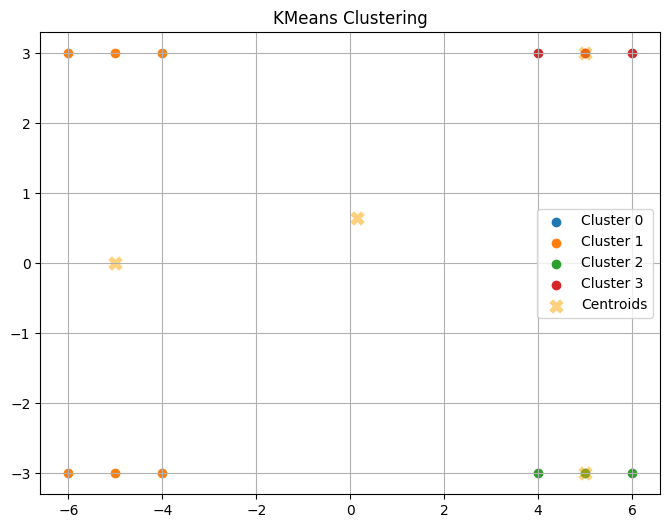

In [13]:


n_clusters, points = test_sample_1(seed=42)
model = KMeans(n_clusters=n_clusters, max_iter=100)
model.fit(points)
print("Centroids:")
print(model.centroids)
model.plot(points)

### Sample case 2

Centroids:
[[ 4.94448048e-01  5.18036631e-01]
 [-1.67858196e-02 -7.52230028e-03]
 [ 1.09390147e+01  1.09180672e+01]]


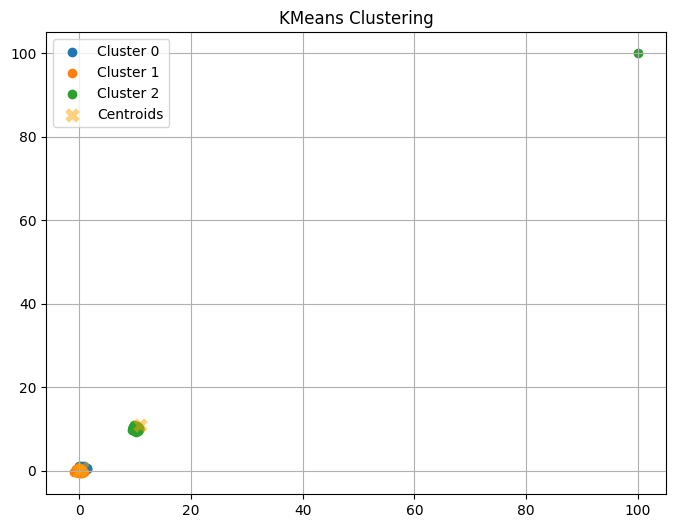

In [14]:
n_clusters, points = test_sample_11(seed=43)
model = KMeans(n_clusters=n_clusters, max_iter=100)
model.fit(points)
print("Centroids:")
print(model.centroids)
model.plot(points)

### Sample case 3

Centroids:
[[12.24620491  3.59015417]
 [ 3.25119353  0.98230659]
 [ 7.85751348  2.64545908]]


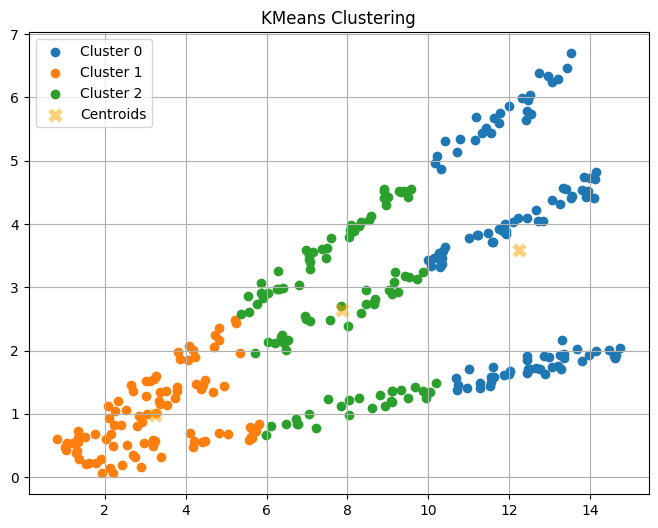

In [15]:
n_clusters, points = test_sample_7(seed=41)
model = KMeans(n_clusters=n_clusters, max_iter=1000)
model.fit(points)
print("Centroids:")
print(model.centroids)
model.plot(points)

-------
-------
-------
-------
-------
-------
-------
-------

## Extra, not required part of the interview.

#### Utility functions definitions

Consider adding the following fuctions to the implementation to help with this part, if necessary.

```python
def metric(self, points: np.ndarray) -> float:
    """
    Metric representing the "goodness" of the clustering fit to given points.

    params:
        points: Numpy array of shape (number of points, number of features).

    returns:
        float number value representing goodness of the fit. 
    """
    raise NotImplementedError()
```

### Ensuring stability and robustness

#### Sample case 2

Metric: 835985566.193158
Centroids:
 [[-8.79916252e-02  8.33833333e+03]
 [-9.64118046e-02  1.56882808e+03]
 [ 1.98499370e-01  5.10373886e+03]]


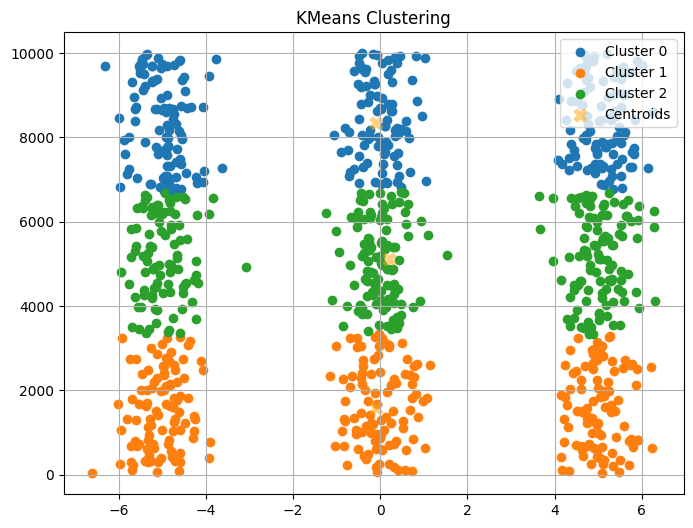

In [16]:
patch_kmeans_with_defaults(KMeans)

n_clusters, points = test_sample_4(seed=42)
model = KMeans(n_clusters=n_clusters, max_iter=1000)
model.fit(points)
print("Metric:", model.metric(points))
print("Centroids:\n", model.centroids)
model.plot(points)

#### Sample case 3

Metric: 51.696292269211305


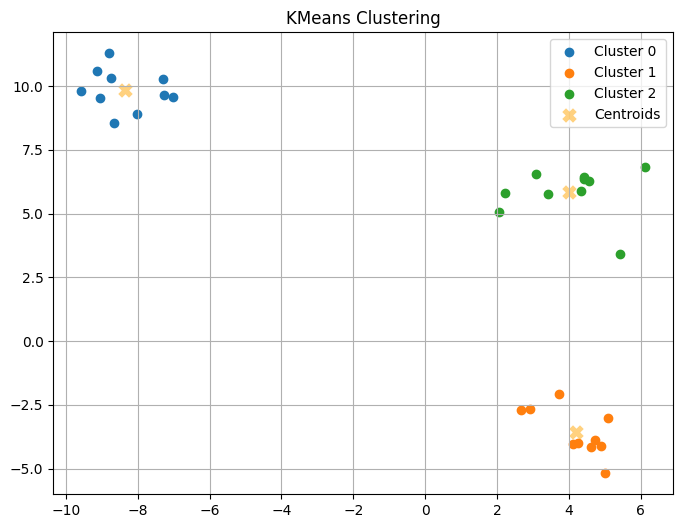

In [17]:
patch_kmeans_with_defaults(KMeans)

n_clusters, points = test_sample_14(seed=47)
model = KMeans(n_clusters=n_clusters, max_iter=10)
model.fit(points)
print("Metric:", model.metric(points))
model.plot(points)

#### Sample cases 4-5

Metric: 13810784228053.203


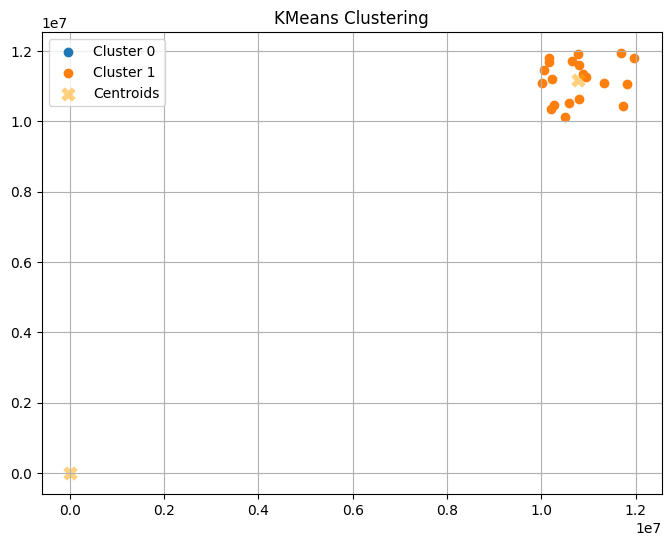

In [18]:
patch_kmeans_with_defaults(KMeans)

n_clusters, points = test_sample_2(seed=43)
model = KMeans(n_clusters=n_clusters, max_iter=10)
model.fit(points)
print("Metric:", model.metric(points))
model.plot(points)

Metric: 1.346830401981016e-15


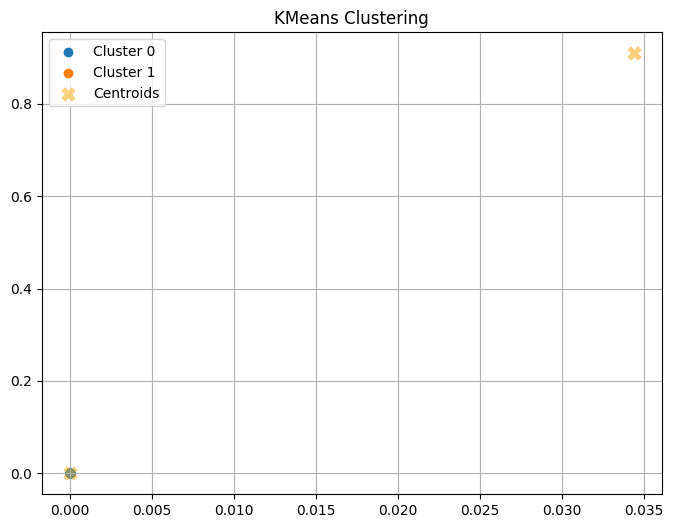

In [19]:
patch_kmeans_with_defaults(KMeans)

n_clusters, points = test_sample_3(seed=42)
model = KMeans(n_clusters=n_clusters, max_iter=1000)
model.fit(points)
print("Metric:", model.metric(points))
model.plot(points)

#### Sample case 7

Centroids:
[[ 0.38199477  0.13661754]
 [ 6.19842204 -0.22390237]]


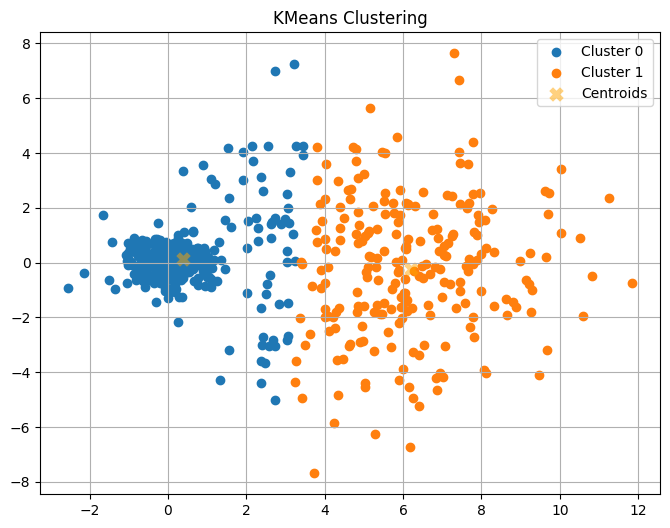

In [20]:
patch_kmeans_with_defaults(KMeans)

n_clusters, points = test_sample_13(seed=42)
model = KMeans(n_clusters=n_clusters, max_iter=100)
model.fit(points)
print("Centroids:")
print(model.centroids)
model.plot(points)

#### Sample case 8

Metric: 8.850362393596395e-05


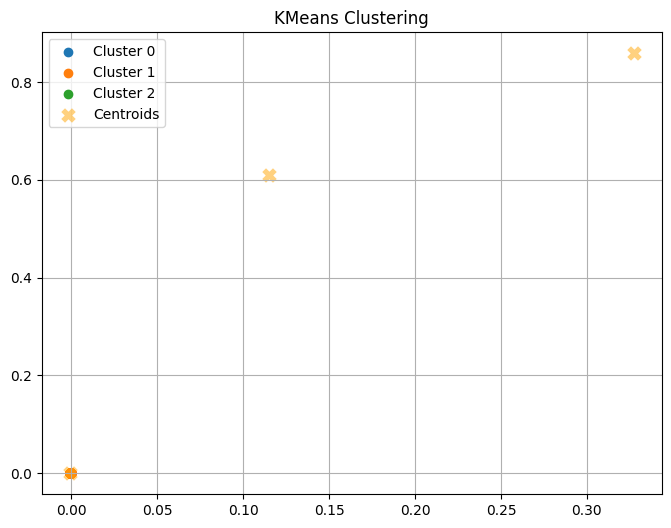

In [21]:
patch_kmeans_with_defaults(KMeans)

n_clusters, points = test_sample_10(seed=43, tol=1e-4)
model = KMeans(thresh=1e-4, n_clusters=n_clusters)
model.fit(points)
print("Metric:", model.metric(points))
model.plot(points)

#### Sample case 9

In [22]:
patch_kmeans_with_defaults(KMeans)

from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
from utils.kmeans_tests import *

# === Step 1: Generate data with noise. ===
n_clusters, points_all = test_sample_12(seed=43)

# === Step 2: Separate the signal. ===
points_signal = points_all[:, :5]

# === Step 3: Run K-Means. ===
kmeans_all = KMeans(n_clusters=n_clusters, max_iter=100)
kmeans_all.fit(points_all)
assignments_all = kmeans_all.get_assignments(points_all)

kmeans_signal = KMeans(n_clusters=n_clusters, max_iter=100)
kmeans_signal.fit(points_signal)
assignments_signal = kmeans_signal.get_assignments(points_signal)

# === Step 4: Compute Silhouette Scores ===
sil_all = silhouette_score(points_all, assignments_all)
sil_signal = silhouette_score(points_signal, assignments_signal)
print(f"Silhouette Score (full 10000D):  {sil_all:.4f}")
print(f"Silhouette Score (signal only): {sil_signal:.4f}")

# === Step 5: Visualize with t-SNE ===
# Reduce both to 2D from 1000D and 5D for fair comparison
points_tsne_all = TSNE(n_components=2, init="pca", perplexity=30, learning_rate='auto', random_state=42).fit_transform(points_all)
points_tsne_signal = TSNE(n_components=2, init="pca", perplexity=30, learning_rate='auto', random_state=42).fit_transform(points_signal)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(points_tsne_all[:, 0], points_tsne_all[:, 1], c=assignments_all, cmap='tab10', s=10)
axs[0].set_title(f"K-means on Full 10000D (Sil: {sil_all:.2f})")

axs[1].scatter(points_tsne_signal[:, 0], points_tsne_signal[:, 1], c=assignments_signal, cmap='tab10', s=10)
axs[1].set_title(f"K-means on Signal 5D (Sil: {sil_signal:.2f})")

for ax in axs:
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    ax.grid(True)

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'utils.kmeans_tests'; 'utils' is not a package

### Broader applications

The following fuction might come in handy:

```python
def plot_metric(K_range: np.ndarray, metrics: np.ndarray) -> None:
    ...
```

#### Limitations and special use of K-Means

##### Sample cases 10-11

In [ ]:
patch_kmeans_with_defaults(KMeans)

n_clusters, points, y_true = test_sample_5(seed=41)
model = KMeans(n_clusters=n_clusters, max_iter=1000)
model.fit(points)
print("Metric:", model.metric(points))
model.plot(points)

In [ ]:
patch_kmeans_with_defaults(KMeans)

n_clusters, points, y_true = test_sample_6(seed=41)
model = KMeans(n_clusters=n_clusters, max_iter=1000)
model.fit(points)
print("Metric:", model.metric(points))
model.plot(points)

#### Selecting K

##### Sample cases 13-14

In [ ]:
patch_kmeans_with_defaults(KMeans)

points = test_sample_8(seed=6)

# Try different K values
metrics = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(points)
    metrics.append(kmeans.metric(points))

plot_metric(np.array(K_range), np.array(metrics))

In [ ]:
patch_kmeans_with_defaults(KMeans)

points = test_sample_9()

# Try different K values
metrics = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(points)
    metrics.append(kmeans.metric(points))

plot_metric(np.array(K_range), np.array(metrics))